In [48]:
import uproot
import awkward as ak
import numpy as np

#Data to return
#Returns sum of these values over each event

infile_name = 'magnify-evt9.root'

infile = uproot.open(infile_name)

print(infile.keys())
#printname = infile_name[44:60] #be careful in hardcoding this...
#events = infile['Events']
    
#fADC = events['raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder./raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj/raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj.fADC']
#fChannel = events['raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder./raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj/raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj.fChannel']

['hu_orig;1', 'hv_orig;1', 'hw_orig;1', 'hu_raw;1', 'hv_raw;1', 'hw_raw;1', 'hu_decon;1', 'hv_decon;1', 'hw_decon;1']


In [49]:
Col_Waveforms = infile['hw_raw']
Col_Waveforms_Numpy = Col_Waveforms.to_numpy()
print(len(Col_Waveforms_Numpy))

3


In [50]:
H = Col_Waveforms_Numpy[0]
xedges = Col_Waveforms_Numpy[1]
yedges = Col_Waveforms_Numpy[2]

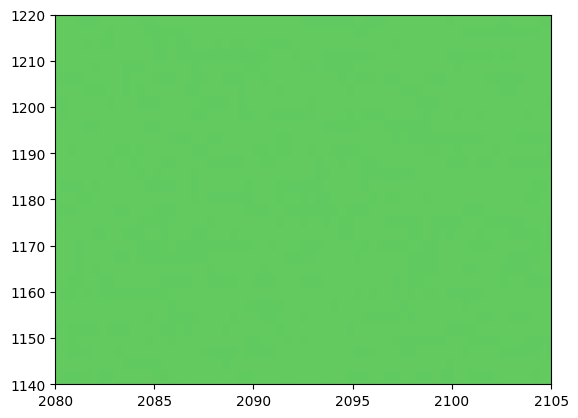

In [51]:
import matplotlib.pyplot as plt

#fig,ax = plt.subplots(1)
#pc = ax.pcolorfast(xedges,yedges,H)
#plt.show()

fig2,ax2 = plt.subplots(1)
pc2 = ax2.pcolorfast(xedges,yedges,H)
plt.xlim(2080,2105)
plt.ylim(1140,1220)
plt.show()

In [52]:
#xedges are 
#yedges are the time ticks - integer steps from 0 to 3000 inclusive. Array size 3001.

print(xedges)
print(yedges)
print(H.shape)
print(H[0].shape)

[1903.5 1904.5 1905.5 ... 3069.5 3070.5 3071.5]
[0.000e+00 1.000e+00 2.000e+00 ... 2.998e+03 2.999e+03 3.000e+03]
(1168, 3000)
(3000,)


In [53]:
xcenters = (xedges[:-1] + xedges[1:]) / 2
timeticks = yedges[:-1]

print(xcenters)
print(timeticks)

[1904. 1905. 1906. ... 3069. 3070. 3071.]
[0.000e+00 1.000e+00 2.000e+00 ... 2.997e+03 2.998e+03 2.999e+03]


In [55]:
print(np.sqrt(np.mean(H[1091]**2)))

2.878149


In [24]:
np.savez('ProtoDUNE_Waveforms.npz',Waveforms = H, Channels = xcenters, Timeticks = timeticks)

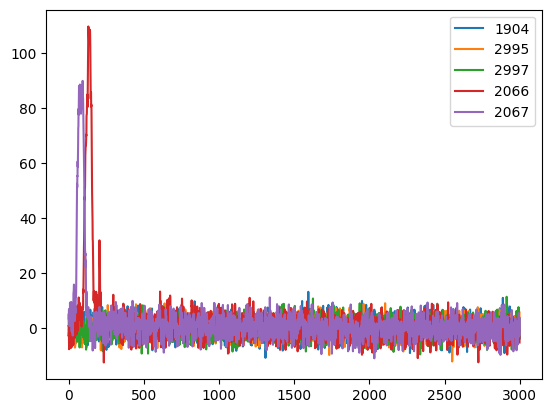

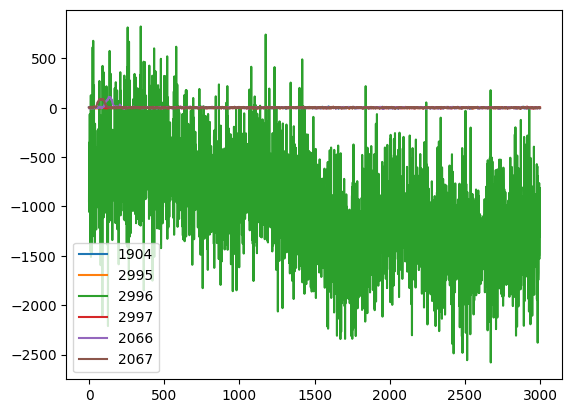

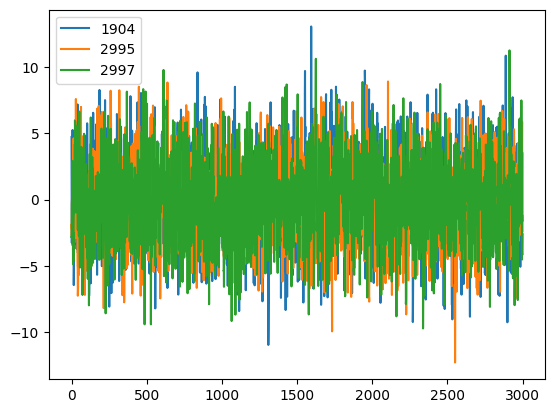

In [8]:
channel_indices_to_plot = [0,1091,1093,np.where(xcenters == 2066)[0][0], np.where(xcenters == 2067)[0][0]]
plt.figure()
for index in channel_indices_to_plot:
    plt.plot(timeticks,H[index],label=int(xcenters[index]))
plt.legend()

channel_indices_to_plot = [0,1091,1092,1093,np.where(xcenters == 2066)[0][0], np.where(xcenters == 2067)[0][0]]
plt.figure()
for index in channel_indices_to_plot:
    plt.plot(timeticks,H[index],label=int(xcenters[index]))
plt.legend()

channel_indices_to_plot = [0,1091,1093]
plt.figure()
for index in channel_indices_to_plot:
    plt.plot(timeticks,H[index],label=int(xcenters[index]))
plt.legend()

In [39]:
weird_Channel= np.where(xcenters == 2996)
print(weird_Channel)

weird_Channel= np.where(xcenters == 2997)
print(weird_Channel)

print(xcenters[1093])

print(np.where(xcenters == 1904))

print(np.where(xcenters == 2066)[0][0])

(array([1092]),)
(array([1093]),)
2997.0
(array([0]),)
162


In [27]:
## At this point, I have looked at the waveforms and I know how to work with the data product. It is time to create the FFTs and PSDs
#2550 is a good clean example. Let's use it as a case study.

#Each time tick is half a microsecond

N=3000
Seconds_Per_Timetick = 5e-7
T = N*Seconds_Per_Timetick

sample_index = np.where(xcenters == 2550)[0][0]

ADCFFT = np.abs(np.fft.rfft(H[sample_index]))
freq = np.fft.rfftfreq(N,Seconds_Per_Timetick)

print(len(freq))
print(ADCFFT)


NameError: name 'xcenters' is not defined

In [36]:
#ADC to mV conversion: 4096 ADC and 2000mV
conversion_factor = 2000/4096

ADCFFT *= conversion_factor

median = ADCFFT.copy()
Window_Size = 50

for i in range(Window_Size):
    median[i] = np.median(ADCFFT[0:i+Window_Size])
for i in range(Window_Size,len(freq)-Window_Size):
    median[i] = np.median(ADCFFT[i-Window_Size:i+Window_Size])
for i in range(len(freq)-Window_Size,len(freq)):
    median[i] = np.median(ADCFFT[i-Window_Size:len(freq)-1])


Text(0, 0.5, 'FT of mV')

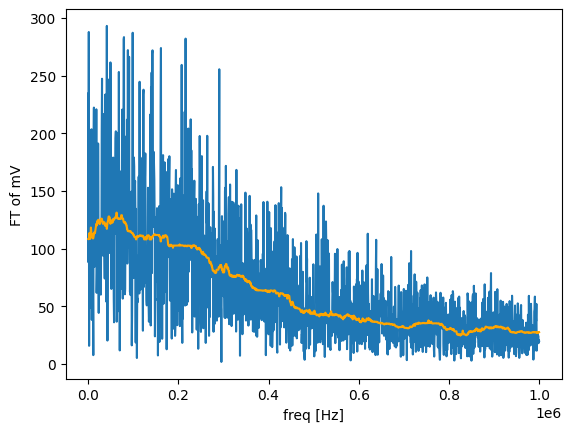

In [38]:
plt.figure()
plt.plot(freq,ADCFFT)
plt.plot(freq,median,color='orange')
plt.xlabel('freq [Hz]')
plt.ylabel('FT of mV')

In [2]:
import uproot
import awkward as ak
import numpy as np

#Let's redo it quick and dirty for one ICEBERG event
ICEBERG_filename = '/home/matt/Documents/ICEBERG/clean_data_files_run5/iceberg_r009693_sr01_20210404T192346_1_dl1_decode.root'

infile = uproot.open(ICEBERG_filename)
events = infile['Events']
    
fADC = events['raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder./raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj/raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj.fADC']
fChannel = events['raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder./raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj/raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj.fChannel']

#Switch to int16 ASAP in order to minimize memory usage. Doesn't really work though!
ADCarr = fADC.array(library = "ak")
ak.values_astype(ADCarr, np.uint16)
Channelarr = fChannel.array(library = "ak")
ak.values_astype(Channelarr, np.uint16)

#We end up with lots of empty events, so when we convert from an awk array to a np array we only take the events with data
        
#Find out if events have data
counter = []
for index in range(len(ADCarr)):
    if(ak.count(ADCarr[index]) >= myprocessor.minwvfm): #If there is at least one active channel...
        counter.append(index)
precutlength = len(ADCarr)
ADCarr = ADCarr[counter] #cut out empty events
Channelarr = Channelarr[counter]

Waveforms = np.zeros((myprocessor.numchannels,myprocessor.minwvfm),dtype=float)
FFT_Array = np.zeros((myprocessor.numchannels,myprocessor.PSDlength),dtype=float)

for nChannel in len(ADCarr):
    GlobalChannel = Channelarr[nChannel]
    Waveforms[GlobalChannel] = np.array(ak.to_numpy(ADCarr[nChannel])) #don't bother masking out cosmics for now...
    FFT_Array[GlobalChannel] = np.fft.rfft(Waveforms[GlobalChannel])



KeyboardInterrupt: 

In [3]:
import uproot
import awkward as ak
import numpy as np

ICEBERG_filename = '/home/matt/Documents/ICEBERG/clean_data_files_run5/iceberg_r009693_sr01_20210404T192346_1_dl1_decode.root'

infile = uproot.open(ICEBERG_filename)

print(infile.keys())
events = infile['Events']
    
fADC = events['raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder./raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj/raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj.fADC']
fChannel = events['raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder./raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj/raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj.fChannel']


['RootFileDB;1', 'MetaData;1', 'FileIndex;1', 'Parentage;1', 'EventHistory;1', 'Events;1', 'EventMetaData;1', 'SubRuns;1', 'SubRunMetaData;1', 'Runs;1', 'RunMetaData;1', 'ResultsTree;1', 'ResultsMetaData;1']


In [4]:
print(len(fADC))
print(fADC)
ADCarr = fADC.array(library = "ak")
ak.values_astype(ADCarr, np.uint16)
print(ADCarr)

Channelarr = fChannel.array(library = "ak")
ak.values_astype(Channelarr, np.uint16)

0
<TBranchElement 'raw::RawDigits_tpcrawdecoder_daq_RunIcebergRawDecoder.obj.fADC' at 0x7eff31751e70>
[[[9088, 9087, 9082, 9075, 9074, ..., 9068, 9069, 9071, 9076, 9080], ...], ...]


<Array [[119, 118, 117, ..., 1138, 1137, 1136], ...] type='163 * var * uint16'>

163
1024
[9088, 9087, 9082, 9075, 9074, 9077, ..., 9072, 9068, 9069, 9071, 9076, 9080]


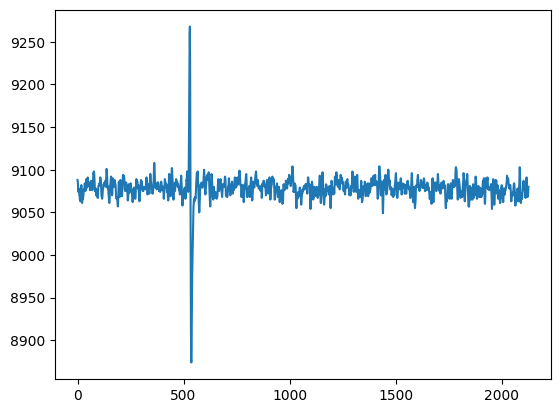

In [5]:
import matplotlib.pyplot as plt

print(len(ADCarr))
print(len(ADCarr[0]))
print(ADCarr[0][0])

plt.figure()
plt.plot(range(len(ADCarr[0][0])),ADCarr[0][0])

#ADCarr[eventindex][channelindex][timetick]

In [6]:
from myprocessor import myprocessor
import numpy as np

Waveforms = np.zeros((myprocessor.numchannels,myprocessor.minwvfm),dtype=float)
Mean_Subtr_Waveforms = np.zeros((myprocessor.numchannels,myprocessor.minwvfm),dtype=float)
FFT_Array = np.zeros((myprocessor.numchannels,myprocessor.PSDlength),dtype=float)
means = np.ones((myprocessor.numchannels),dtype=float)
NoiseRMS = np.zeros((myprocessor.numchannels),dtype=float)

#Just do the first event
for nChannel in range(len(ADCarr[0])):
    GlobalChannel = Channelarr[0][nChannel]
    Waveforms[GlobalChannel], tempcutouts = myprocessor.mask_fast(np.array(ADCarr[0][nChannel]))

    FFT_Array[GlobalChannel] = np.abs(np.fft.rfft(Waveforms[GlobalChannel]))
    FFT_Array[GlobalChannel][0]=0

    means[GlobalChannel] = np.mean(Waveforms[GlobalChannel])

    Mean_Subtr_Waveforms[GlobalChannel] = Waveforms[GlobalChannel] - means[GlobalChannel]*np.ones(myprocessor.minwvfm)
    NoiseRMS[GlobalChannel] = np.sqrt(np.mean(Mean_Subtr_Waveforms[GlobalChannel]**2))




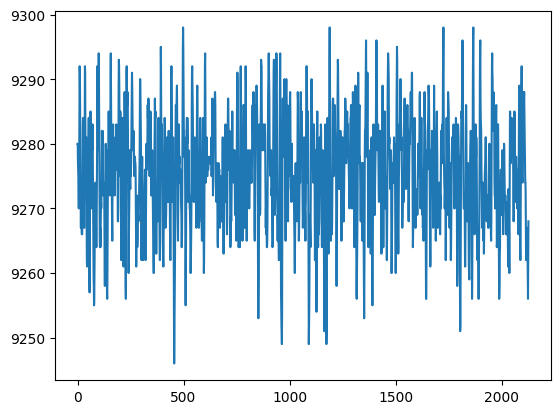

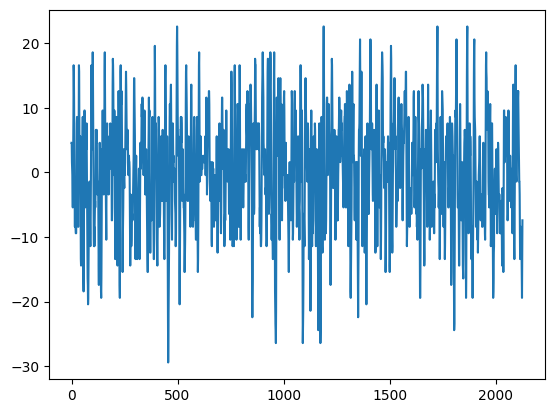

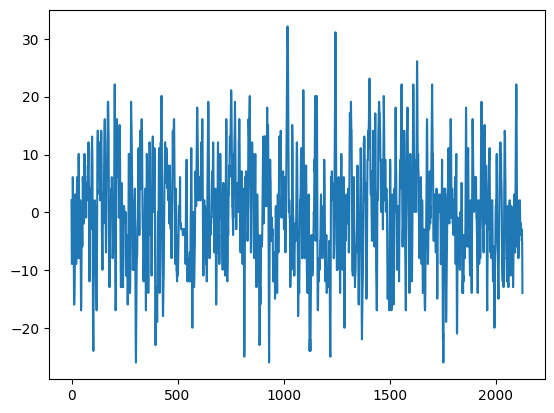

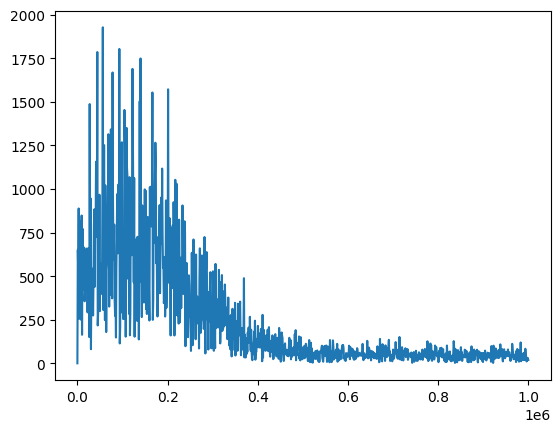

In [7]:
from plotter import plotter
freq = np.fft.rfftfreq(plotter.minwvfm,plotter.SampleSpacing)

plt.figure()
plt.plot(range(plotter.minwvfm),Waveforms[850])

plt.figure()
plt.plot(range(plotter.minwvfm),Mean_Subtr_Waveforms[850])

plt.figure()
plt.plot(range(plotter.minwvfm),Mean_Subtr_Waveforms[100])

plt.figure()
plt.plot(freq,FFT_Array[850])

In [8]:
ADCFFT = FFT_Array[850]

median = ADCFFT.copy()
Window_Size = 50

for i in range(Window_Size):
    median[i] = np.median(ADCFFT[0:i+Window_Size])
for i in range(Window_Size,len(freq)-Window_Size):
    median[i] = np.median(ADCFFT[i-Window_Size:i+Window_Size])
for i in range(len(freq)-Window_Size,len(freq)):
    median[i] = np.median(ADCFFT[i-Window_Size:len(freq)-1])


In [9]:
Conv_Factor = np.zeros(plotter.numplanes)
Slope = np.array([3039,3039,3030]) #2 induction planes, 1 collection plane

Conv_Factor = 1/Slope * 24*10**3 * 1.6*10**(-4) * 14
print(Conv_Factor)

ADCFFT*= Conv_Factor[2]
median*=Conv_Factor[2]


[0.01769003 0.01769003 0.01774257]


Text(0, 0.5, 'FT of mV')

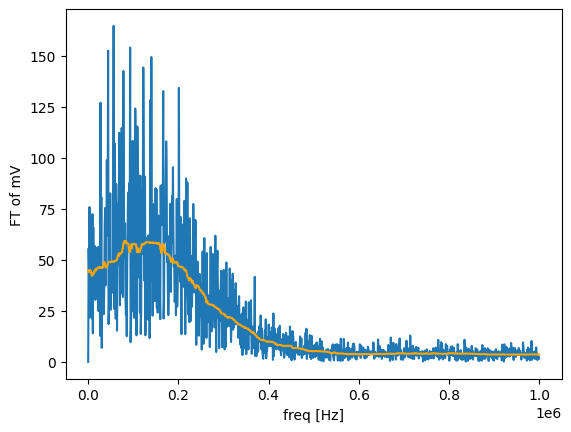

In [10]:
plt.figure()
plt.plot(freq,ADCFFT/Conv_Factor[2] * 1400/2**14)
plt.plot(freq,median/Conv_Factor[2] * 1400/2**14,color='orange')
plt.xlabel('freq [Hz]')
plt.ylabel('FT of mV')

8.435572944260812
9.163684486423076
0.149668779367479


([<matplotlib.axis.XTick at 0x7eff7c1e3d30>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34')])

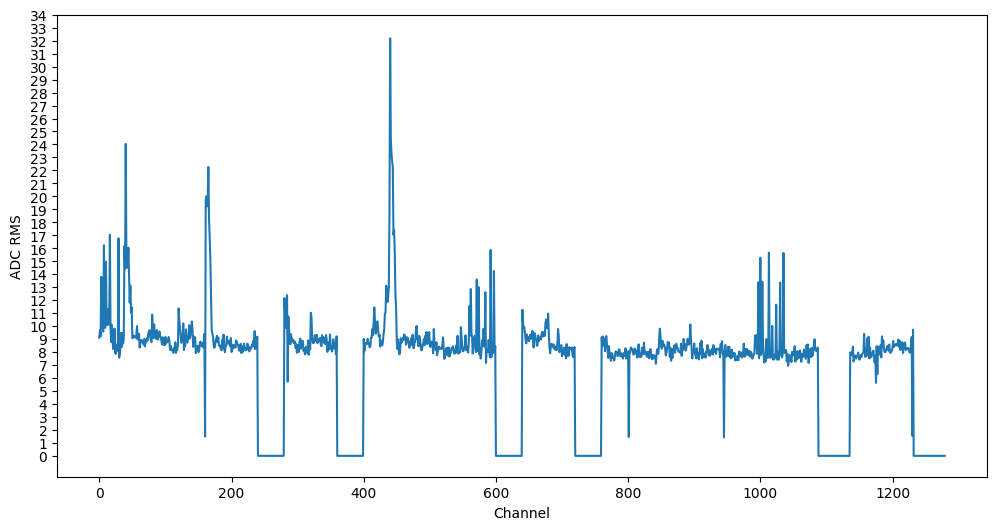

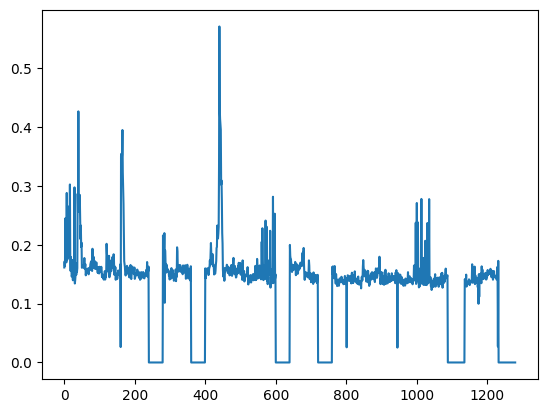

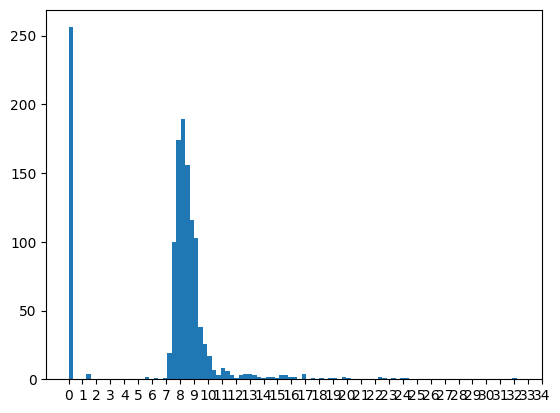

In [21]:
##RMS Plots

plt.figure(figsize=(12,6))
plt.plot(range(plotter.numchannels),NoiseRMS)
plt.yticks(ticks=range(35))
plt.ylabel('ADC RMS')
plt.xlabel('Channel')
#plt.xlim(850,1250)
#plt.ylim(2,18)

plt.figure()
plt.plot(range(plotter.numchannels),NoiseRMS*Conv_Factor[2])

print(NoiseRMS[850])
print(NoiseRMS[100])

print(NoiseRMS[850]*Conv_Factor[2])

plt.figure()
plt.hist(NoiseRMS,bins=100)
plt.xticks(ticks=range(35))


